Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name.

In [0]:
NAME = "NAMAN JAIN VIMAL KUMAR"

---

# Assignment Description
The purpose of this assignment is to gain some experience with multilayer and convolutional networks.
This assignment will be fairly open-ended, but I will give some general guidelines.

# Part 1 - Fully Connected Feed Forward Networks
Train a feedforward networks in python to perform a task of your choice. If you don't have anything in mind, you can do classification of some common datasets (MNIST, Fashion MNIST). You may find it interesting to use other datasets (faces, etc).

Please don't do anything simpler than this, unless it's interesting (a problem in your research, from your work, using a unique dataset).

You may use libraries for this assignment (tensorflow, keras, sklearn, etc). Please don't use other neural network libraries (pytorch, etc).

You may re-use code from previous assignment. You may follow some tutorial, but please some unique contribution (use a different dataset, for example).

# 1A - Preprocessing
Code that does any imports, data loading, preprocessing, normalization goes in the cell below. Please use only a single cell.

You may do this however you wish, but should follow the practices we learned in class (shuffling data, normalizing, etc).

If you want to experiment with some feature transformations, I would encourage it (just be careful of generating too many features).

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf    # Of course, we need TensorFlow.
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization


# Constants
epoch_size = 100
sample_size = 10
learning_rate = 0.0001
x_epochs = range(epoch_size)

# Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing the dataset
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

Using TensorFlow backend.


# 1B - Model definition
Create a fully connected feedforward network model. You can use whatever you want in terms of activation functions/architecture/etc.

However please make sure your architecture is compatible with the task you choose.

In [0]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),

    Dense(512),
    Activation('relu'),
    Dropout(rate=0.2),

    Dense(256),
    Activation('relu'),
    Dropout(rate=0.2),

    Dense(128),
    Activation('relu'),
    Dropout(rate=0.2),

    Dense(64),
    Activation('relu'),
    Dropout(rate=0.2),

    Dense(10),
    Activation('softmax')
])

opt = keras.optimizers.rmsprop(lr=learning_rate, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# 1C - Training
Train a single fully connected network for this task. If you do some kind of hyperparameter search, just include the best parameters in your submission.

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 8s 209us/step - loss: 2.1270 - acc: 0.2055 - val_loss: 1.9311 - val_acc: 0.3001
Epoch 2/100
40000/40000 [==============================] - 8s 195us/step - loss: 1.9450 - acc: 0.2912 - val_loss: 1.8297 - val_acc: 0.3496
Epoch 3/100
40000/40000 [==============================] - 7s 185us/step - loss: 1.8549 - acc: 0.3309 - val_loss: 1.7796 - val_acc: 0.3598
Epoch 4/100
40000/40000 [==============================] - 8s 194us/step - loss: 1.8035 - acc: 0.3502 - val_loss: 1.7235 - val_acc: 0.3830
Epoch 5/100
40000/40000 [==============================] - 8s 196us/step - loss: 1.7534 - acc: 0.3743 - val_loss: 1.6551 - val_acc: 0.4190
Epoch 6/100
40000/40000 [==============================] - 8s 188us/step - loss: 1.7230 - acc: 0.3881 - val_loss: 1.6630 - val_acc: 0.4102
Epoch 7/100
40000/40000 [==============================] - 7s 176us/

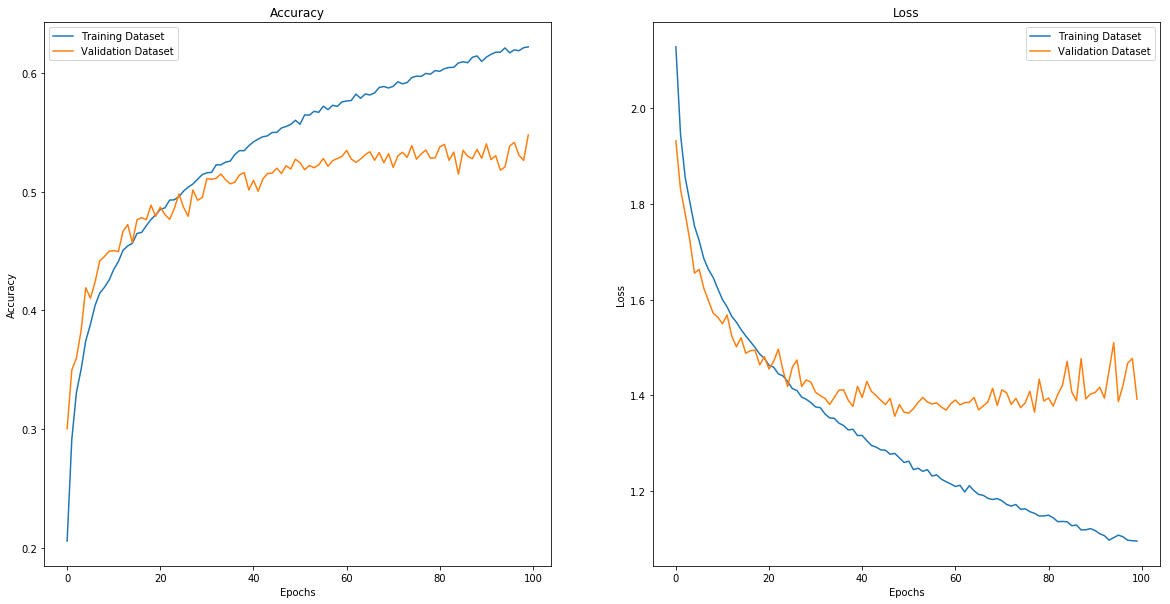

In [0]:
# YOUR CODE HERE
train_stats = model.fit(x_train, y_train, epochs=epoch_size, validation_split=0.2)
print("Accuracy at different epochs = "+str(train_stats.history["acc"]))
print("Loss at different epochs = "+str(train_stats.history["loss"]))

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Accuracy");
ax[1].set_title("Loss");
ax[0].plot(x_epochs, train_stats.history['acc'], '',label='Training Dataset')
ax[1].plot(x_epochs, train_stats.history['loss'], '',label='Training Dataset') 
ax[0].plot(x_epochs, train_stats.history['val_acc'], '',label='Validation Dataset')
ax[1].plot(x_epochs, train_stats.history['val_loss'], '',label='Validation Dataset') 

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend();

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();

# 1D - Quantitative Evaluation
Do some quantitative evaluation of your trained model. At minimum you should report the accuracy on some withheld data. Plots would be preferable.

In [0]:
# Testing for withheld Data
test_stats = model.evaluate(x_test, y_test)         
print("Model Accuracy = " + str(test_stats[1])) 
print("Model Loss = " + str(test_stats[0]))

10000/10000 [==============================] - 1s 61us/step
Model Accuracy = 0.5401
Model Loss = 1.3653994373321534


# 1E - Qualitative Evaluation
Do some qualitative evaluation of your trained model. 

An example would be visualizing a small sample (10 or so) of images that were correctly classified from your validation data, and another sample of incorrectly classified samples.

1/1 [==============================] - 0s 3ms/step


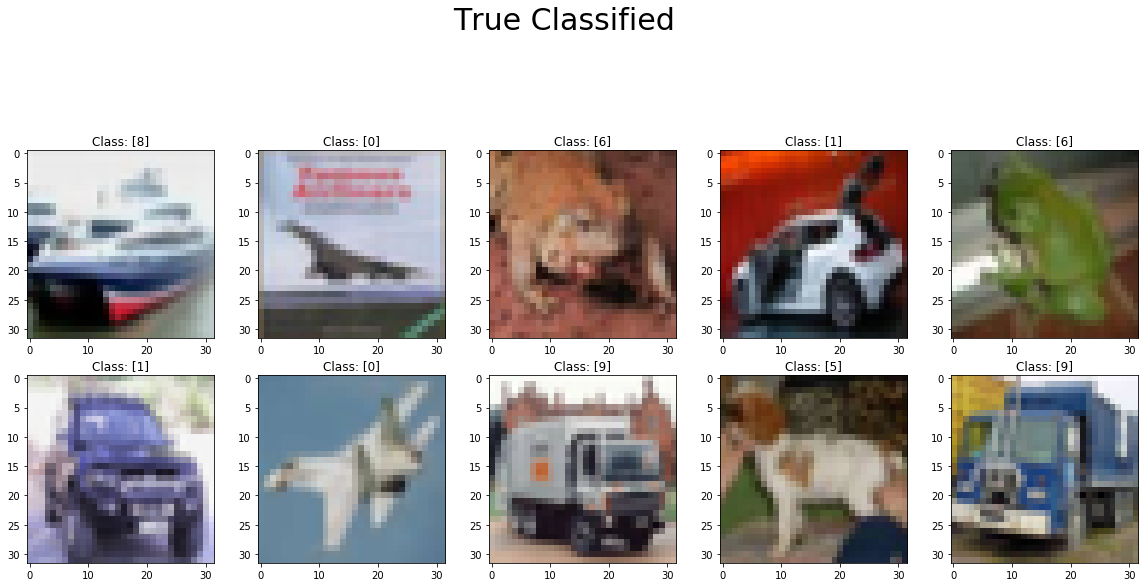

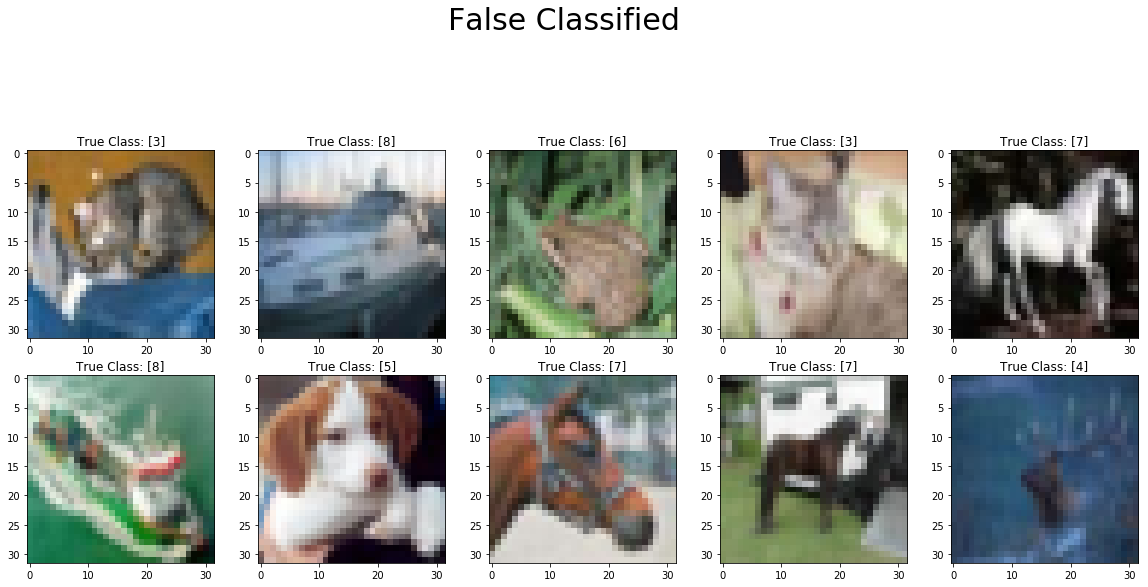

In [0]:
true_classified = []
false_classified = []

index = 0
while len(true_classified) < sample_size or len(false_classified) < sample_size:
  test_state = model.evaluate(x_test[index:index+1], y_test[index:index+1])
  if test_state[1] == 0.0:
    if len(false_classified) < sample_size:
      false_classified.append(index)
  else:
    if len(true_classified) < sample_size:
      true_classified.append(index)
  index = index + 1

fig_true = plt.figure(figsize=(20,20))
fig_true.suptitle("True Classified", fontsize=30)
for index in range(sample_size):
  a = fig_true.add_subplot(int(sample_size/2), 5, index+1)
  plt.imshow(x_test[true_classified[index]])
  a.set_title("Class: "+str(y_test[true_classified[index]]))

fig_false = plt.figure(figsize=(20,20))
fig_false.suptitle("False Classified", fontsize=30)
for index in range(sample_size):
  b = fig_false.add_subplot(int(sample_size/2), 5, index+1)
  plt.imshow(x_test[false_classified[index]])
  b.set_title("True Class: "+str(y_test[false_classified[index]]))

# 1F - Report
Write a few sentence summary of your work on part 1. It should answer the following questions:

1. What task were you trying to solve?
2. How did you implement it?
3. How did it perform? Did it do well? Overfit? Underfit?
4. Cite any resources/tutorials you used (informally, just a URL is ok). Citing papers isn't necessary.
5. This is meant to be a very simple summary (like the 'abstract' of a paper). No diagrams/etc necessary.

### 1. To solve Image Classification problem using Flatten Architecture. The dataset used here is cifar10 from Keras Dataset library

### 2. Initially, the images are normalized by dividing their intensities by 255. A model first has a flatten layer of 32x32x3 pixels (Input layer) and is followed by a multilayer of Dense layers with ReLU Activation of different sizes. The output is sparse categorial (Softmax) of size 10 as we have 10 different classes that images can be classified into. The loss here is sparse categorial cross entropy, and the learning rate of 0.0001 has been used. [Tested with previous value. Found best results with 0.0001]. Thus the classification is performed using a feedforward network.

### 3. From the graphs above, we can say that the model starts to over fit when epoch ranges from 25 to 35. This is because, we see a descent in Loss of Training Dataset but gain in Loss of Validation Dataset.

### 4. References: 

*   Keras Documentation
*   Tensorflow Documentation
*   Stackoverflow

### 5. With the model here, we can achieve an accuracy close to 0.65 with an epoch of 100. This type of classification for images doesn't make much sense as a similar image with different orientation could generate different output. This is due to the corresponding pixel value dependencies. Also, weights to be used here are very high as very pixel is given with a weight. This increases the size of the net and performance is hit. We can see overfitting at a very stage too. Thus for images, such architecture is not recommended.

# Part 2 - Advanced architectures (CNN/RNN)
In part 2 train an advanced architecture like a CNN to perform the same task from part 1. Please assume part 1 and 2 are run independently. So you may need to repeat code twice.

You do not need to do anything super fancy (don't try to train a 50 layer residual network, etc).

# 2A - Preprocessing
Code that does any imports, data loading, preprocessing, normalization goes in the cell below.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf    # Of course, we need TensorFlow.
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Dataset of 50,000 32x32x3 color training images, labeled over 10 categories, and 10,000 test images.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing the dataset
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2B - Model definition
Create a fully connected feedforward network model. You can use whatever you want in terms of activation functions/architecture/etc.

However please make sure your architecture is compatible with the task you choose.

In [0]:
# YOUR CODE HERE
learning_rate = 0.0001
batch_size = y_train.shape[0]
model = Sequential([
    Conv2D(32, kernel_size=(3,3), strides=1, padding="same", input_shape=(32, 32, 3)),
    Conv2D(32, kernel_size=(3,3), strides=1, padding="same"),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Dropout(rate=0.2),
    
    Conv2D(32, kernel_size=(3,3), strides=1, padding="same"),
    Conv2D(32, kernel_size=(3,3), strides=1, padding="same"),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Dropout(rate=0.2),
    
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(rate=0.2),
    BatchNormalization(),

    Dense(256),
    Activation('relu'),
    Dropout(rate=0.2),
    BatchNormalization(),

    Dense(10),
    Activation('softmax')
])

opt = keras.optimizers.rmsprop(lr=learning_rate, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 2C - Training
Train a more advanced (CNN/RNN) for this task. If you do some kind of hyperparameter search, just include the best parameters in your submission.

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 13s 337us/step - loss: 2.1761 - acc: 0.2792 - val_loss: 1.5896 - val_acc: 0.4266
Epoch 2/100
40000/40000 [==============================] - 12s 304us/step - loss: 1.6329 - acc: 0.4245 - val_loss: 1.4750 - val_acc: 0.4758
Epoch 3/100
40000/40000 [==============================] - 12s 288us/step - loss: 1.4453 - acc: 0.4899 - val_loss: 1.2370 - val_acc: 0.5625
Epoch 4/100
40000/40000 [==============================] - 12s 308us/step - loss: 1.3200 - acc: 0.5333 - val_loss: 1.1592 - val_acc: 0.5873
Epoch 5/100
40000/40000 [==============================] - 12s 301us/step - loss: 1.2230 - acc: 0.5693 - val_loss: 1.2266 - val_acc: 0.5720
Epoch 6/100
40000/40000 [==============================] - 11s 286us/step - loss: 1.1428 - acc: 0.5971 - val_loss: 1.0300 - val_acc: 0.6435
Epoch 7/100
40000/40000 [==============================] - 11s 286us/step - loss: 1.0784 - acc: 0.6204 - val_l

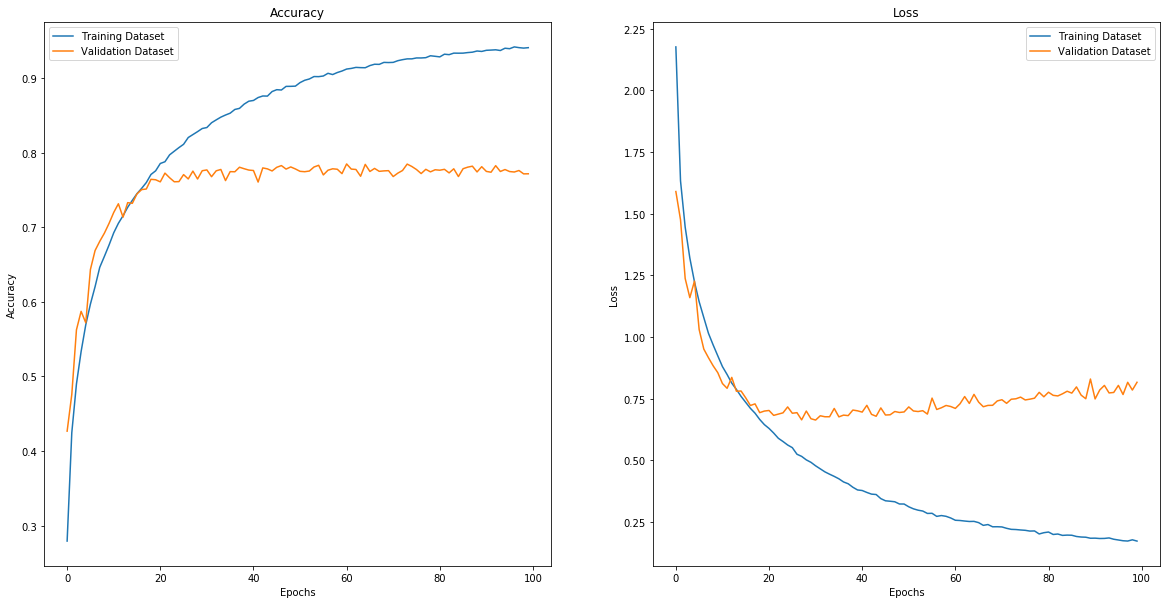

In [0]:
train_stats = model.fit(x_train, y_train, epochs=epoch_size, validation_split=0.2)
print("Accuracy at different epochs = "+str(train_stats.history["acc"]))
print("Loss at different epochs = "+str(train_stats.history["loss"]))

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Accuracy");
ax[1].set_title("Loss");
ax[0].plot(x_epochs, train_stats.history['acc'], '',label='Training Dataset')
ax[1].plot(x_epochs, train_stats.history['loss'], '',label='Training Dataset') 
ax[0].plot(x_epochs, train_stats.history['val_acc'], '',label='Validation Dataset')
ax[1].plot(x_epochs, train_stats.history['val_loss'], '',label='Validation Dataset') 

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend();

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();

# 2D - Quantitative Evaluation
Re-do the quantiative evaluation from part 1 using this more advanced model.

In [0]:
test_stats = model.evaluate(x_test, y_test)         
print("Model Accuracy = " + str(test_stats[1])) 
print("Model Loss = " + str(test_stats[0]))

10000/10000 [==============================] - 1s 83us/step
Model Accuracy = 0.7751
Model Loss = 0.8418251567840577


# 2E - Qualitative Evaluation
Re-do the qualitative evaluation from part 1 using this more advanced model.

1/1 [==============================] - 0s 4ms/step


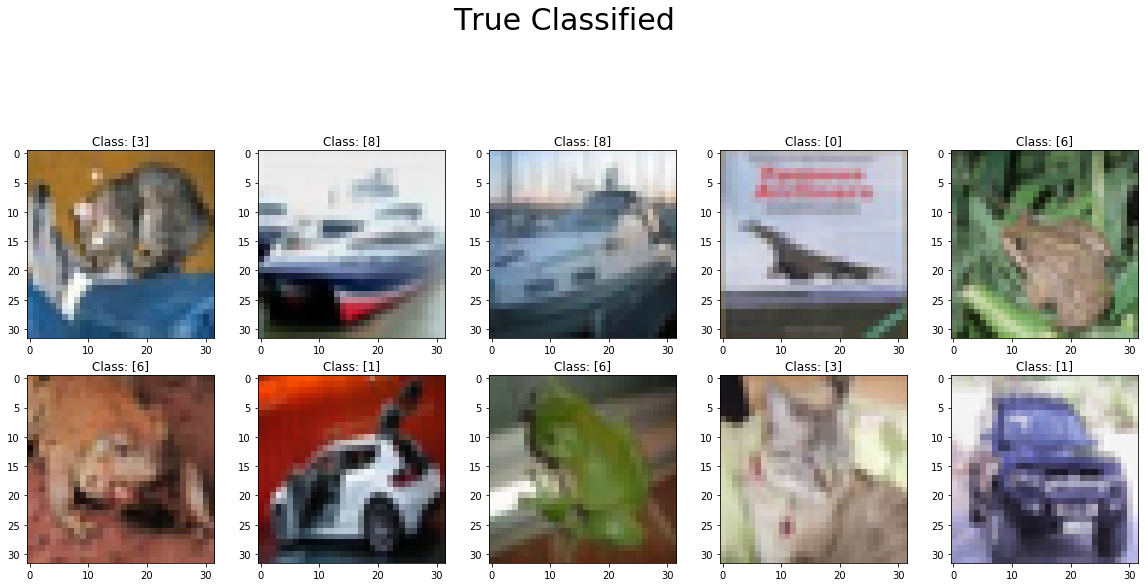

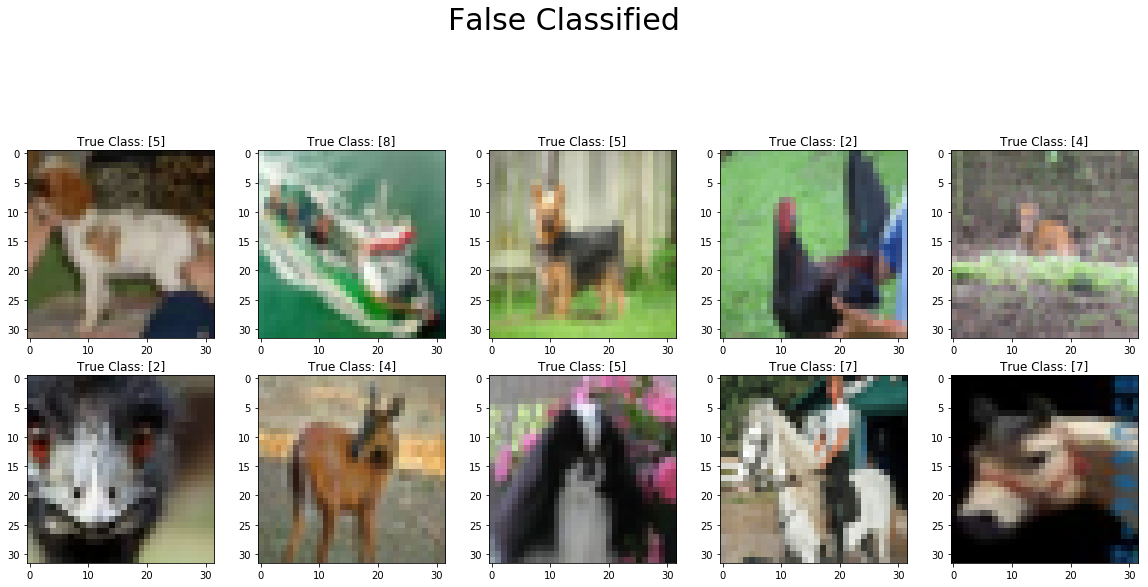

In [0]:
sample_size = 10

true_classified = []
false_classified = []

index = 0
while len(true_classified) < sample_size or len(false_classified) < sample_size:
  test_state = model.evaluate(x_test[index:index+1], y_test[index:index+1])
  if test_state[1] == 0.0:
    if len(false_classified) < sample_size:
      false_classified.append(index)
  else:
    if len(true_classified) < sample_size:
      true_classified.append(index)
  index = index + 1

fig_true = plt.figure(figsize=(20,20))
fig_true.suptitle("True Classified", fontsize=30)
for index in range(sample_size):
  a = fig_true.add_subplot(int(sample_size/2), 5, index+1)
  plt.imshow(x_test[true_classified[index]])
  a.set_title("Class: "+str(y_test[true_classified[index]]))

fig_false = plt.figure(figsize=(20,20))
fig_false.suptitle("False Classified", fontsize=30)
for index in range(sample_size):
  b = fig_false.add_subplot(int(sample_size/2), 5, index+1)
  plt.imshow(x_test[false_classified[index]])
  b.set_title("True Class: "+str(y_test[false_classified[index]]))

# 2F - Report
Write a few sentence summary of your work on part 2. Focus on the differences from part 1.

The summary should at least answer the following questions:
1. What task were you trying to solve?
2. How did you implement it.
3. How did it perform? Can you interpret the performance metrics in plain english? Did it do well? Overfit? Underfit?
4. Cite any resources/tutorials you used (informally, just a URL is ok). Citing papers isn't necessary.
5. This is meant to be a very simple summary (like the 'abstract' of a paper). No diagrams/etc necessary.

You can do some basic formatting with markdown if you'd like.


### 1. To solve Image Classification problem using Convolution Architecture. The dataset used here is cifar10 from Keras Dataset library

### 2. Initially, the images are normalized by dividing their intensities by 255. A model first has a Convolution layers of 32x32x3 pixels (Input layer) and Activation layer of ReLU and followed by Max Pool Layer of pool window size of 2. This is followed by similar layers. 1st Conv layer helps us to define shapes, second to get features. It then follows a fully connected network, first the output from CNN is Flattened and then used in Dense Layers. The final output layer is sparse categorial (Softmax) of size 10 as we have 10 different classes that images can be classified into. The loss here is sparse categorial cross entropy, and the learning rate of 0.001 has been used. [Tested with previous value. Found best results with 0.001]. Thus the classification is performed using a convolution network.

### 3. From the graphs above, we can say that the model starts to over fit when epoch ranges from 25 to 35. This is because, we see a descent in Loss of Training Dataset but gain in Loss of Validation Dataset.

### 4. References: 

*   Keras Documentation
*   Tensorflow Documentation
*   Stackoverflow

### 5. Using Convolution Neural Network we can achieve better results at a very early age when compared to the previous method. Convolution usually helps to see if image consists of certain shapes and features that usually help in classification of an object. Once the CNN has learnt the same, the testing data can be checked to have such features. This helps in generating better output with less iterations. Here, we achieve an accuracy of 0.65 only at epoch = 10 [and overfitting occurs only after epoch = 25], which is a significant improvisation when compared to previous method.